# Project Definition and Problem Framing

## 1. Define the Objective

The goal of this project is to **predict the price of a car based on its features**.  
The price is a continuous target variable, and the prediction will be based on attributes such as brand, model, horsepower, fuel type, transmission, etc.

**Objective (concise):**  
> Predict the selling price of a car using its technical and categorical features to provide a data-driven estimate of vehicle value.

---

## 2. How should you frame this problem?

- **Type of learning:**  
  → **Supervised learning**  
  Since we have labeled data with features and a target price.

- **Problem type:**  
  → **Regression**  
  Because the target variable (`price`) is continuous numerical data, not categories.

---

## 3. How should performance be measured?

Typical regression evaluation metrics include:

| Metric          | Explanation                                                            |
|-----------------|------------------------------------------------------------------------|
| **MSE**         | Mean Squared Error – penalizes large errors heavily                    |
| **RMSE**        | Root Mean Squared Error – easier to interpret as it’s in the unit of price |
| **MAE**         | Mean Absolute Error – average absolute difference                      |
| **R² Score**    | Proportion of variance explained by the model (max is 1.0)            |

**Recommended:** Use RMSE for error magnitude plus R² for overall fit.

Example in code:

        ```python
        from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
        import numpy as np

        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)


## 4. What would be the minimum performance needed?  
This is optional but important in real projects.

**Example answer:**

In a real-world scenario, an RMSE below €3,000 might be acceptable for average car prices around €25,000. Additionally, the model should explain at least 80% of the price variance (R² > 0.8). These thresholds depend on the specific use case (e.g., private sales vs. dealer valuation).

You can skip this step or provide a rough estimate for learning purposes.


## 5. How would you solve the problem manually?  
This helps to understand the intuition behind the problem.

Manually, I would look for comparable cars — similar brand, model, year, horsepower, colors, and features. Then I would estimate the price based on the prices of these similar vehicles. Important factors would be brand, horsepower, condition, mileage, transmission type, and fuel type.

**Summary:**

- Find similar cars by key features.
- Compare their price ranges.
- Estimate an average or weighted price.
- Adjust for special features like warranty or color.

This is similar to a manual k-nearest neighbors approach.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load the dataset
df = pd.read_csv(r'topic21_v23_train.csv')

df.head()         # preview



,0,1,2,3,4,brand,model,trim,body_type,fuel_type,transmission_type,engine_capacity_cc,horsepower,exterior_color,interior_color,warranty,city,seller_type,price
0,-9.144503,0.743550,-16.489788,-2.061620,9.841349,Mitsubishi,Pajero,GLS,SUV,Petrol,Automatic Transmission,3500 - 3999 cc,200 - 299 HP,White,Beige,Yes,Dubai,Dealer,99000
1,-9.266482,0.097627,NaN,-2.074546,-4.275723,Dodge,Charger,SXT Plus,Sedan,Petrol,Automatic Transmission,NaN,200 - 299 HP,Blue,Black,Yes,Dubai,Dealer,44000
2,-9.716771,0.267655,9.142331,-2.049009,-4.633859,Mercedes-Benz,C-Class Coupe,C 300 Coupe,Coupe,Petrol,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,White,Unknown,Yes,Dubai,Dealer,77000
3,-9.090952,0.546821,3.564012,NaN,0.111344,Ford,F-Series Pickup,Platinum,Pick Up Truck,Petrol,Automatic Transmission,NaN,300 - 399 HP,Blue,Black,Yes,Sharjah,Dealer,189000
4,-9.378142,0.445845,19.807487,-2.034526,-10.524625,BMW,7-Series,740Li,Sedan,Petrol,Automatic Transmission,3000 - 3499 cc,300 - 399 HP,Grey,Beige,No,Dubai,Dealer,52900


In [6]:
df.describe()     # statistical overview

,0,1,2,3,4,price
count,7501.000000,7472.000000,7359.000000,7556.000000,7495.000000,7962.000000
mean,-9.438078,0.452438,7.568061,-2.064945,-5.629605,163331.653228
std,0.581623,0.230029,22.345339,0.031739,12.840825,188397.899880
min,-11.181288,0.009259,-29.587914,-2.114086,-39.405581,1000.000000
25%,-9.846732,0.332279,-5.938190,-2.085547,-9.805190,44999.250000
50%,-9.513059,0.422859,4.752633,-2.069652,-3.904727,93000.000000
75%,-9.093442,0.534145,17.771023,-2.050266,3.069533,207000.000000
max,-7.557632,1.932165,586.357373,-1.688366,19.411526,999900.000000


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [8]:
list(df.columns)


['0',
 '1',
 '2',
 '3',
 '4',
 'brand',
 'model',
 'trim',
 'body_type',
 'fuel_type',
 'transmission_type',
 'engine_capacity_cc',
 'horsepower',
 'exterior_color',
 'interior_color',
 'warranty',
 'city',
 'seller_type',
 'price']

In [9]:
# Convert engine_capacity and horsepower to numeric
df['engine_capacity_cc'] = pd.to_numeric(df['engine_capacity_cc'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Remove rows with missing prices or horsepower
df_clean = df.dropna(subset=['price', 'horsepower', 'engine_capacity_cc'])



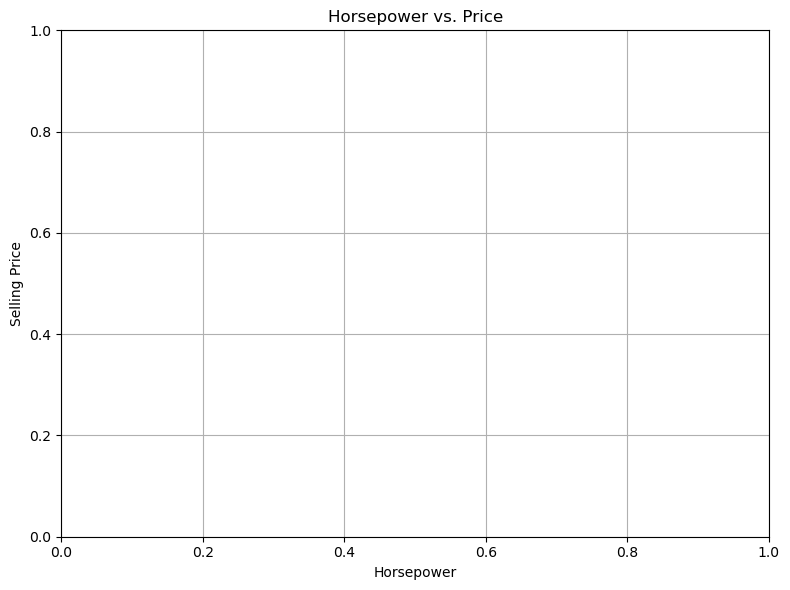

In [10]:
# 1. Relationship between horsepower and price 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='horsepower', y='price', alpha=0.5)
plt.title("Horsepower vs. Price")
plt.xlabel("Horsepower")
plt.ylabel("Selling Price")
plt.grid(True)
plt.tight_layout()
plt.show()



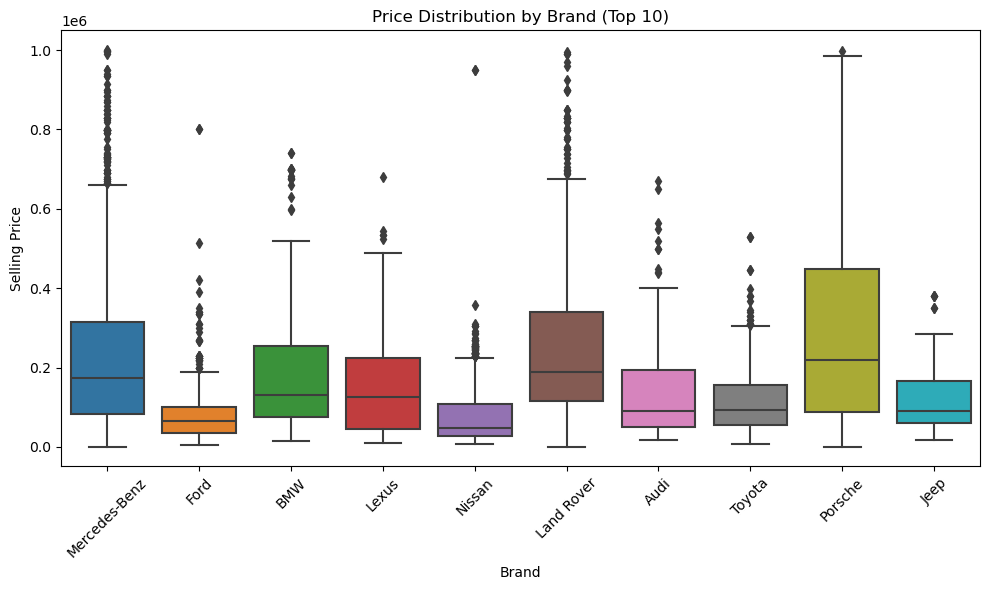

In [11]:
# 2. Average price by brand (top 10 brands)
top_brands = df['brand'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['brand'].isin(top_brands)], x='brand', y='price')
plt.xticks(rotation=45)
plt.title("Price Distribution by Brand (Top 10)")
plt.ylabel("Selling Price")
plt.xlabel("Brand")
plt.tight_layout()
plt.show()




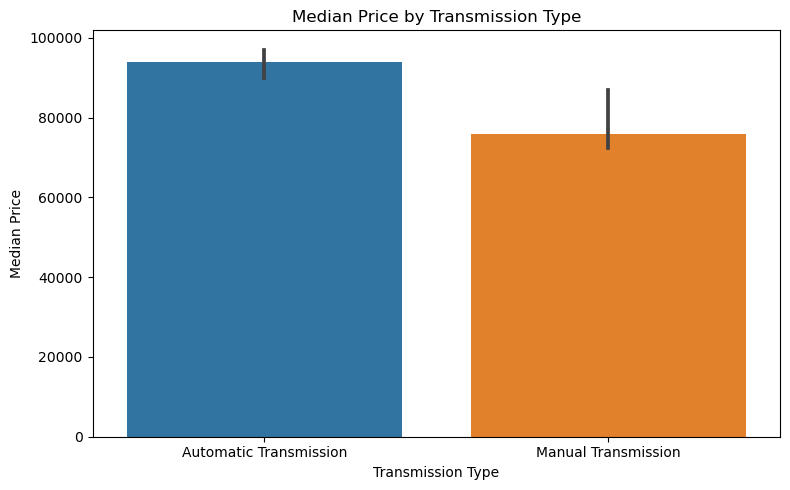

In [12]:
# 3. Average price by transmission type
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='transmission_type', y='price', estimator='median')
plt.title("Median Price by Transmission Type")
plt.ylabel("Median Price")
plt.xlabel("Transmission Type")
plt.tight_layout()
plt.show()



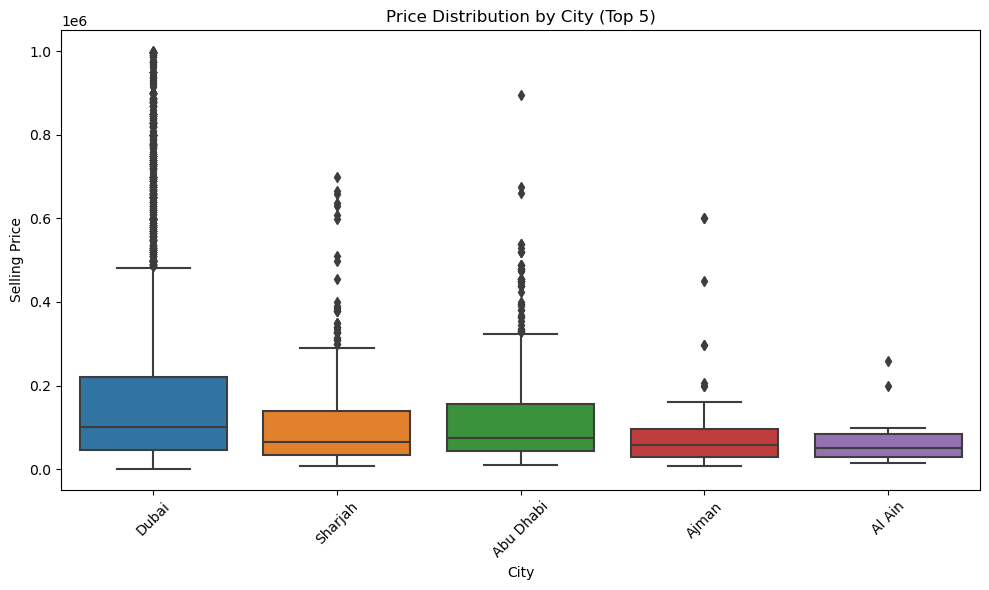

In [15]:
# 4. Price distribution by city (top 5 cities)
top_cities = df['city'].value_counts().nlargest(5).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['city'].isin(top_cities)], x='city', y='price')
plt.title("Price Distribution by City (Top 5)")
plt.xlabel("City")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()